In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

/var/folders/fv/3yl7kz_13sjfcjlh2s051yqw0000gn/T/ipykernel_29030/1003008109.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
crime_df = pd.read_csv("../week_06/crime_data.csv")
crime_df.head()

,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


<Axes: >

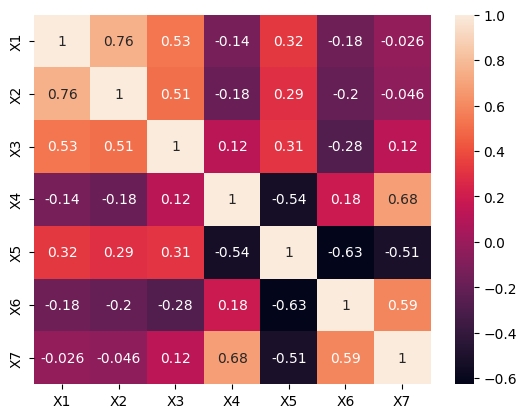

In [4]:
# for multiple linear regression (and other models) we need to use
# variables that are correlated with the outcome BUT as uncorrelated
# with each other as possible in our equation

correlation = crime_df.corr()
sns.heatmap(correlation, annot=True)

In [5]:
y = crime_df['X1']
X = crime_df[['X2','X5']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
"""
LinearRegression is a class and we are creating an instance (instantiating)
that class
"""

regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = regression.predict(X_test)
y_pred

array([762.85812777, 892.35981193, 749.27052915, 895.45614362,
       503.48965345, 890.21757946, 667.12167926, 711.4891275 ,
       733.57097117, 521.30117078, 498.2672238 , 577.86033169,
       711.39431635, 463.32799351, 673.77226389])

In [8]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

0.29590518141678257

In [9]:
regression.coef_

array([0.365106  , 4.50835216])

In [10]:
# what is the equation for this model?
# x1 = .37*x2 + 4.51*x5

# OLS Regression

OLS (ordinary least squares) regression is a type of linear regression that lets you handle interactions as well as features that dont have interactions. With OLS regression you can incorporate features that are correlated with each other

In [ ]:
! pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [15]:
from statsmodels.formula.api import ols
diabetes_df = pd.read_csv("../week_06/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
diabetes_vs_insulin = ols("Outcome ~ Insulin", data = diabetes_df).fit()
print(diabetes_vs_insulin.params)

# Outcome = .000540*insulin + .305844
# OLS regression i(or any type of regression weve talked about)
# doesnt make sense to use for a binary outcome problem (or
# and discrete outcome problem)


Intercept    0.305844
Insulin      0.000540
dtype: float64


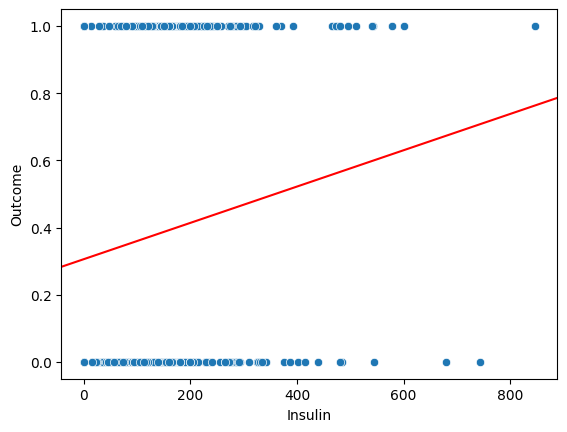

In [22]:
intercept, slope = diabetes_vs_insulin.params
sns.scatterplot(x='Insulin',
                y='Outcome',
                data=diabetes_df)

plt.axline(xy1=(0,intercept), slope = slope, color='red')

In [24]:
"""
 OLS works best when we have a gradient of outcomes were trying
 to predict (continuous data) BUT we can use logistic regression
 to predict binary outcomes. 
 These are just examples of how the code works BUT the outcomes
 are meaningless. No interaction between two variables - low
 or no correlation between the parameters should be used to 
 predict the outcome here. 
"""
age_gl_no_int = ols('Outcome ~ Age + Glucose', data = diabetes_df).fit()
print(age_gl_no_int.params)
# Outcome = .00503*Age + .006473*Glucose - .600748

Intercept   -0.600748
Age          0.005030
Glucose      0.006473
dtype: float64


In [ ]:
# with interaction - there is a correlation between the params
# used to predict the outcome
age_gl_int = ols('Outcome ~ Age*Glucose', data=diabetes_df).fit()
print(age_gl_int.params)
# Outcome = .014172*Age + .008923*Glucose - .000072*Age*Glucose - .905058 

Intercept     -0.905058
Age            0.014172
Glucose        0.008923
Age:Glucose   -0.000072
dtype: float64
